In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
ms = pd.read_csv('data/psfa_microsoft.csv')

In [4]:
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
1,2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2,2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
3,2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
4,2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


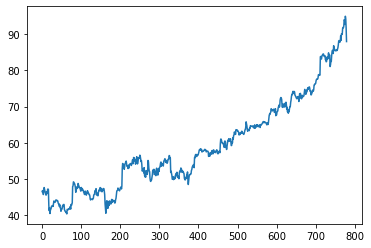

In [5]:
ms['Close'].plot()

In [6]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

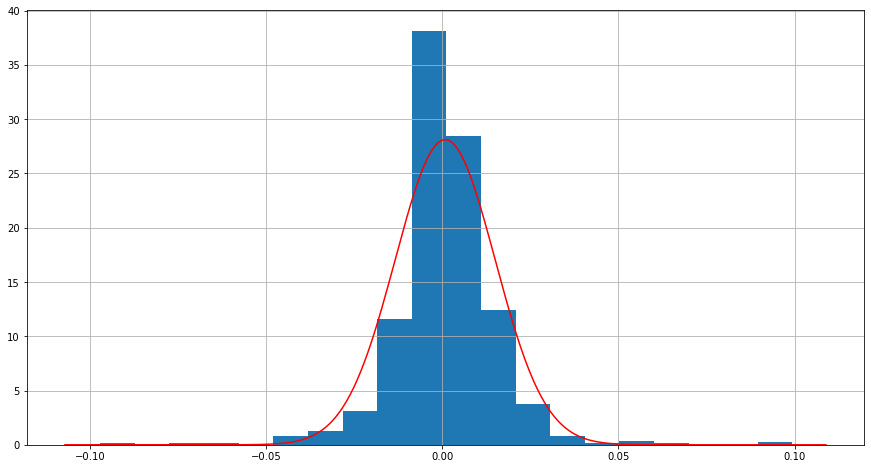

In [7]:
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=20, figsize=(15, 8), density=True)
plt.plot(density['x'], density['pdf'], color='red')

# Probabilidad de que el retorno caiga más de un 1% en un día

In [8]:
R_hoy = 40.3
R_ayer = 41.1
R_hoy/R_ayer

0.9805352798053527

In [9]:
np.log(R_hoy/R_ayer)

-0.019656652549551713

In [10]:
umbral = np.log(0.99)

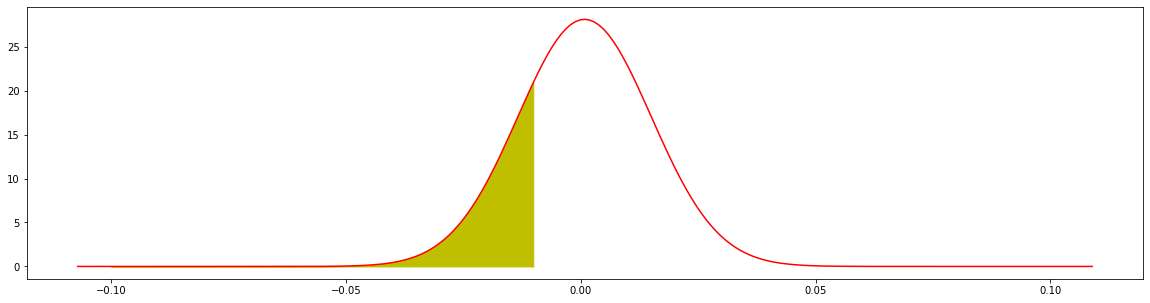

In [11]:
plt.figure(figsize=(20,5))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, umbral, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')

In [12]:
norm.cdf(umbral, mu, sigma)

0.22184708277066306

# En un año

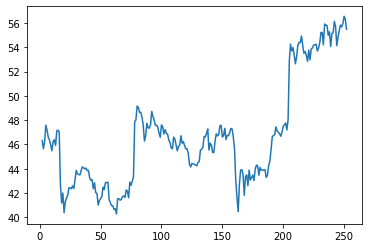

In [13]:
filtro = (ms['Date'] > '2015-01-02') & (ms['Date'] < '2016')

ms[filtro]['Close'].plot()

In [14]:
N = len(ms[filtro])
N

251

In [15]:
# suponemos que son independientes (En realidad no lo sos)

mu_year = N*mu
sigma_year = (N**0.5) * sigma

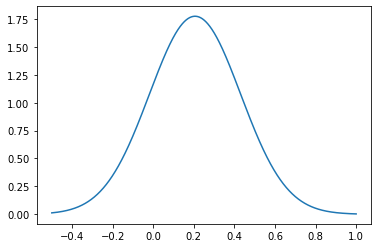

In [17]:
rango_year = np.arange(-0.5, 1, 0.0001)
pdf_year = norm.pdf(rango_year, mu_year, sigma_year)
plt.plot(rango_year, pdf_year)

# Comparación de un año vs día

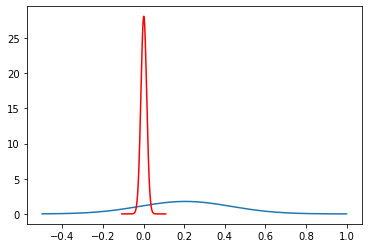

In [19]:
pdf_year = norm.pdf(rango_year, mu_year, sigma_year)
plt.plot(rango_year, pdf_year)
plt.plot(density['x'], density['pdf'], color='red')

# Probabilidad de caer un 20% en un año

In [20]:
umbral_year = np.log(0.8)

In [21]:
umbral_year

-0.2231435513142097

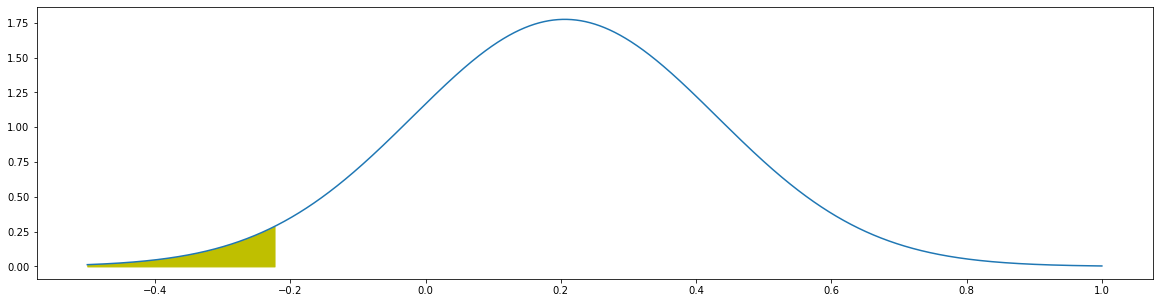

In [26]:
plt.figure(figsize=(20,5))
plt.plot(rango_year, pdf_year)
rango_year_2 = np.arange(-0.5, umbral_year, 0.0001)
plt.fill_between(rango_year_2, norm.pdf(rango_year_2, mu_year, sigma_year), y2=0, color='y')

# Valor en riesgo (Value at risk) - VaR - Por día

In [44]:
# Valor en riesgo de un 5% (1% y 5% son comunes. Y por día o por semana)
VaR = norm.ppf(0.05, mu, sigma)
print(VaR)

-0.02252336240706499


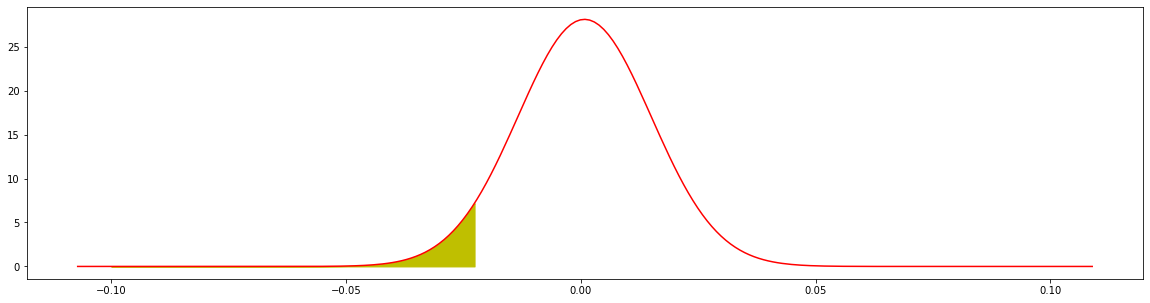

In [45]:
plt.figure(figsize=(20,5))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, VaR, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')

In [46]:
(1 - np.exp(VaR))*100

2.227160516224802

# Cuantiles

0.024163825379311023


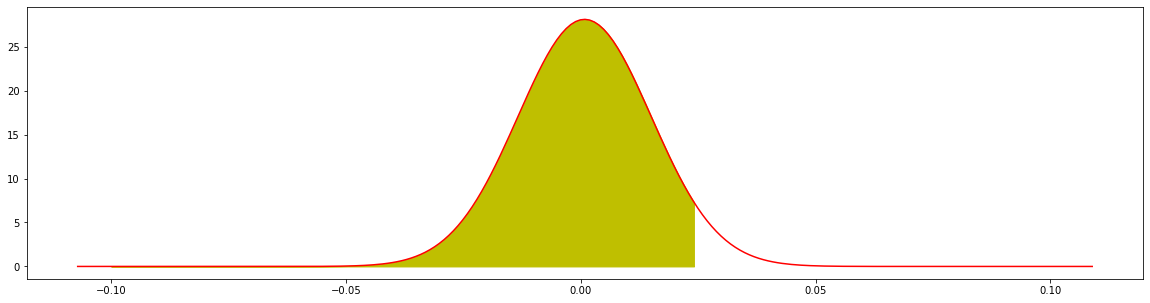

In [50]:
Q = norm.ppf(0.95, mu, sigma)

plt.figure(figsize=(20,5))
plt.plot(density['x'], density['pdf'], color='red')
rango = np.arange(-0.1, Q, 0.0001)
plt.fill_between(rango, norm.pdf(rango, mu, sigma), y2=0, color='y')
print(Q)